In [65]:
import pandas as pd
import sklearn
from scipy import misc
import cv2
import numpy as np 

from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier 

from sklearn.metrics import plot_confusion_matrix
from matplotlib import pyplot as plt
import gc

# path = '/Users/fsaxena/Documents/UCL/Masters/IntroML1/AMLSassignment19_20/AMLS_19-20_SN14002056'
path = '/home/fsaxena/amls/AMLSassignment19_20/AMLS_19-20_SN14002056'


assignment_celeb = 'celeba'
assignment_cartoon = 'cartoon_set'

In [66]:
def data_loader(path_to_root, assignment):
    return pd.read_csv(path_to_root + '/Datasets/original_dataset_AMLS_19-20/' + assignment + '/labels.csv', sep='\t')
    

In [67]:
def convert_image_to_vector_and_resize(file):
    img = cv2.imread(file, cv2.IMREAD_UNCHANGED)
    scale_percent = 35 # percent of original size
    width = int(img.shape[1] * scale_percent / 100)
    height = int(img.shape[0] * scale_percent / 100)
    dim = (width, height)
    # resize image
    resized_img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    return resized_img

In [68]:
path_to_img=path+'/Datasets/original_dataset_AMLS_19-20/'+assignment_cartoon+'/img/1.png'
path_pre_img = path+'/Datasets/original_dataset_AMLS_19-20/'+assignment_cartoon+'/img/'

In [69]:
## Now need to add each raw pic to each part of the training set

In [70]:
cartoon_dataframe = data_loader(path, assignment_cartoon)
print(cartoon_dataframe)

      Unnamed: 0  eye_color  face_shape file_name
0              0          1           4     0.png
1              1          2           4     1.png
2              2          2           3     2.png
3              3          2           0     3.png
4              4          0           2     4.png
...          ...        ...         ...       ...
9995        9995          3           2  9995.png
9996        9996          0           3  9996.png
9997        9997          1           2  9997.png
9998        9998          0           2  9998.png
9999        9999          2           2  9999.png

[10000 rows x 4 columns]


In [71]:
vec_Array = []
toTensor = torchvision.transforms.ToTensor()

for img_name in cartoon_dataframe['file_name']:
    img_vec = np.array(convert_image_to_vector_and_resize(path_pre_img + img_name))
    vec_Array.append(img_vec)

In [72]:
x_dataset = vec_Array
y_dataset = np.array(cartoon_dataframe['eye_color'])

In [73]:
from sklearn.model_selection import train_test_split
 
x, X_test, y, y_test = train_test_split(
    x_dataset,
    y_dataset,
    test_size=0.2,
    shuffle=True,
    random_state=42,
)

In [74]:
X_train = x
y_train = y

In [75]:
X_train = np.array(X_train)
X_train = np.reshape(X_train, (8000, 122500))
X_test = np.reshape(X_test, (2000, 122500))
print(X_train.shape)
print(y_train.shape)
X_test.shape

(8000, 122500)
(8000,)


(2000, 122500)

In [76]:
modelName='DTree'

Percentage correct:  35.75
Percentage correct:  51.85
Percentage correct:  66.85
Percentage correct:  83.25
Percentage correct:  83.25
Percentage correct:  83.45
Percentage correct:  84.05
Percentage correct:  84.55


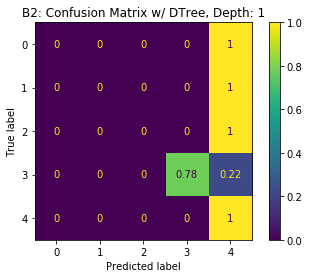

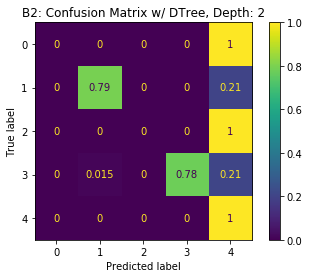

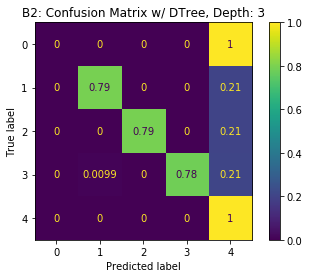

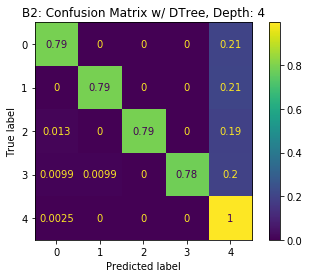

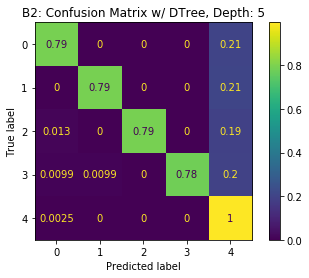

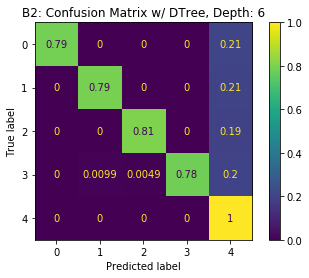

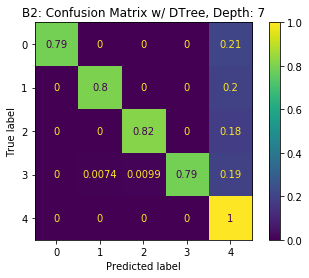

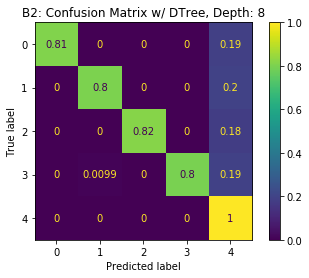

In [77]:
for i in range(1,9):
    depth = i
    dtree_model = DecisionTreeClassifier(max_depth = i).fit(X_train, y_train) 
    dtree_predictions = dtree_model.predict(X_test) 

    labels = np.array(['0', '1', '2', '3', '4'])



    dsp = plot_confusion_matrix(dtree_model, X_test, y_test, display_labels=labels, normalize='true')

    plt.title("B2: Confusion Matrix w/ " + modelName +  ", Depth: " + str(depth))

    accuracy_score = 100*np.sum(dtree_model.predict(X_test) == y_test)/len(y_test)
    accuracies_plot = []
    accuracies_plot.append(accuracy_score)
    
    print('Percentage correct: ', accuracy_score)

    with open('B2/Confusion_Matrix'+modelName + '_depth_'+str(depth) + '.png', 'wb') as dsp:
        plt.savefig(dsp)

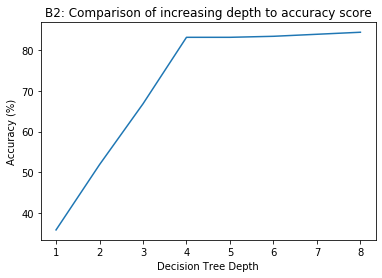

In [78]:
B2_accuracies_decision_tree = [ 35.75,51.85,66.85,83.25,83.25,83.5,84.0,84.5 ]
B2_dt_depth = [1, 2, 3, 4, 5, 6, 7, 8]
plt.xlabel('Decision Tree Depth')
plt.ylabel('Accuracy (%)')
plt.title('B2: Comparison of increasing depth to accuracy score')
plt.plot(B2_dt_depth, B2_accuracies_decision_tree)